# AAclust: Selecting redundancy-reduced scale sets

The **Amino Acid clustering (AAclust)** class is k-optimized clustering wrapper for selecting redundancy-reduced sets of numerical scales, introduced in [Breimann24a]_.

We load an example scale dataset to showcase it:

In [13]:
import aaanalysis as aa
aa.options["verbose"] = False

# Create test dataset of 25 amino acid scales
df_scales = aa.load_scales()
X = df_scales.T

``AAclust`` can utilize any clustering model that uses the ``n_clusters`` parameter:

In [14]:
from sklearn.cluster import KMeans

# AAclust with KMens (default)
aac = aa.AAclust(model_class=KMeans)

By fitting ``AAclust``, its three-step algorithm is performed to select an optimized ``n_clusters`` (k). The three steps involve (1) an estimation of lower bound of k, (2) refinement of k, and (3) an optional clustering merging. Various results are saved as attributes: 

In [15]:
# Fit clustering model (KMeans by default)
aac = aa.AAclust()
aac.fit(X)
# Get output parameters
n_clusters = aac.n_clusters
print("n_clusters: ", n_clusters)

n_clusters:  53


Instead of optimizing the number of clusters, we can pre-defined it using the ``n_clusters`` parameter:

In [16]:
# Fit clustering model with pre-selected k
labels = aac.fit(X, n_clusters=5).labels_

We can obtain visualize the clustering results and the obtained clustering centers using the respective plotting ``AAclustPlot`` class.
All data points are visualized in the PCA plot including the cluster centers highlighted by an ‘x’:

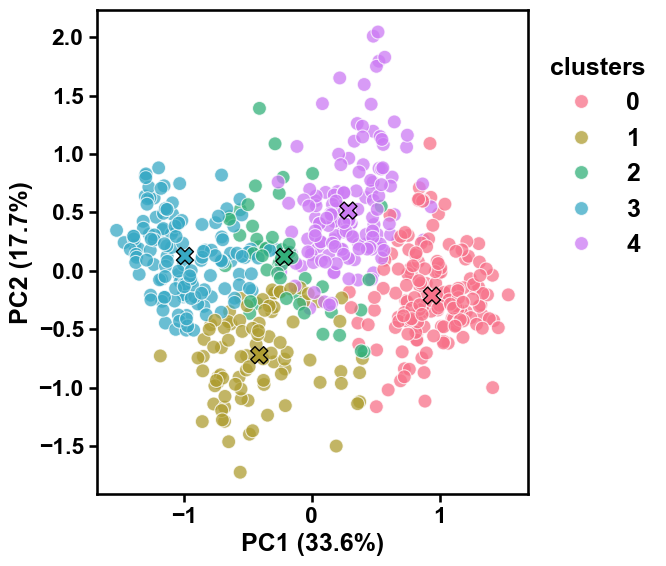

In [17]:
import matplotlib.pyplot as plt

aac_plot = aa.AAclustPlot()
aa.plot_settings()
ax, df_components = aac_plot.centers(X, labels=labels)
plt.show()

To obtain redundancy-reduced scale sets, ``AAclust`` selects one `medoid` per cluster, which is the scale closest to center of the respective cluster. These can be highlighted using the ``AAclustPlot.medoids`` method  

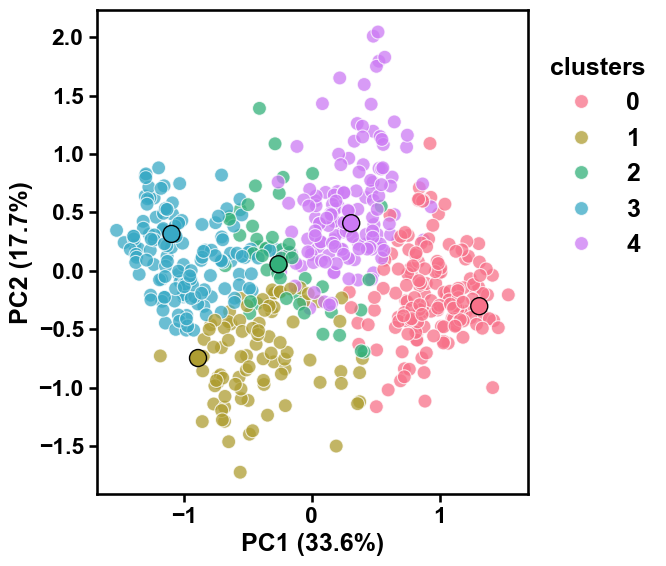

In [18]:
aac_plot = aa.AAclustPlot()
aa.plot_settings()
ax, df_components = aac_plot.medoids(X, labels=labels)
plt.show()

For further details, see our [Feature Engineering API](https://aaanalysis.readthedocs.io/en/latest/api.html#feature-engineering), [AAontology Usage Principels](https://aaanalysis.readthedocs.io/en/latest/index/usage_principles/aaontology.html), and  [AAclust Usage Principels](https://aaanalysis.readthedocs.io/en/latest/index/usage_principles/aaclust.html).